# Parte 1

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

## Dataframes

In [2]:
df_sales = pd.read_csv('./vendas.csv', delimiter=';')
df_register = pd.read_csv('./cadastro.csv', delimiter=';')

In [3]:
df_sales.head()

,cod_venda,cod_cadastro,produto,valor
0,1,1,Refrigerante,6.5
1,2,2,Chocolate,4.0
2,3,3,Suco,5.0
3,4,4,Bolacha,3.5
4,5,5,Cereal,11.9


In [4]:
df_register.head()

,cod_cadastro,estado_civil,grau_instrucao,num_filhos,salario,idade_anos,reg_procedencia
0,1,solteiro,1-ensino fundamental,NaN,4.00,26,interior
1,2,casado,1-ensino fundamental,1.0,4.56,32,capital
2,3,casado,1-ensino fundamental,2.0,5.25,36,capital
3,4,solteiro,2-ensino medio,NaN,5.73,20,outra
4,5,solteiro,1-ensino fundamental,NaN,6.26,40,outra


## Tratamento de dados df_register

* A coluna num_filhos possui 16 dados faltantes;
* Tipagem de dados incorreta para num_filhos;
* Salários representados de forma incorreta;
* grau_instrucao com dados sujos "1-ensino medio", por exemplo.

In [5]:
df_register.shape

(36, 7)

In [6]:
df_register.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cod_cadastro     36 non-null     int64  
 1   estado_civil     36 non-null     object 
 2   grau_instrucao   36 non-null     object 
 3   num_filhos       20 non-null     float64
 4   salario          36 non-null     float64
 5   idade_anos       36 non-null     int64  
 6   reg_procedencia  36 non-null     object 
dtypes: float64(2), int64(2), object(3)
memory usage: 2.1+ KB


In [7]:
df_register.isna().sum()

cod_cadastro        0
estado_civil        0
grau_instrucao      0
num_filhos         16
salario             0
idade_anos          0
reg_procedencia     0
dtype: int64

* Neste caso, `não pode-se atribuir` uma quantidade de filhos para as pessoas que possuem "`NaN quantidade de filhos`;
* Serão preenchidos com o número `0`.

In [8]:
df_register['num_filhos'].unique()

array([nan,  1.,  2.,  0.,  3.,  5.])

In [9]:
df_register['num_filhos'].fillna(0, inplace=True)

* Confirmação de valores ausentes:

In [10]:
df_register.isna().sum()

cod_cadastro       0
estado_civil       0
grau_instrucao     0
num_filhos         0
salario            0
idade_anos         0
reg_procedencia    0
dtype: int64

* Mudar tipagem de dados de `float` para `int` na variável num_filhos

In [11]:
df_register['num_filhos'] = df_register['num_filhos'].astype('int64')

In [12]:
df_register.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cod_cadastro     36 non-null     int64  
 1   estado_civil     36 non-null     object 
 2   grau_instrucao   36 non-null     object 
 3   num_filhos       36 non-null     int64  
 4   salario          36 non-null     float64
 5   idade_anos       36 non-null     int64  
 6   reg_procedencia  36 non-null     object 
dtypes: float64(1), int64(3), object(3)
memory usage: 2.1+ KB


Alterar os valores dos salários para números compatíveis:
* Mudar 4.56, por exemplo para 4560.00.

In [13]:
df_register['salario'] = df_register['salario']*1000

In [14]:
df_register['grau_instrucao'] = df_register['grau_instrucao'].apply(lambda x: f'{x[2:]}')
df_register.head()

,cod_cadastro,estado_civil,grau_instrucao,num_filhos,salario,idade_anos,reg_procedencia
0,1,solteiro,ensino fundamental,0,4000.0,26,interior
1,2,casado,ensino fundamental,1,4560.0,32,capital
2,3,casado,ensino fundamental,2,5250.0,36,capital
3,4,solteiro,ensino medio,0,5730.0,20,outra
4,5,solteiro,ensino fundamental,0,6260.0,40,outra


## Tratamento de dados df_sales

* Dataframe vendas não possui valores faltantes;
* Tipagem de dados correta para cada variável.

In [15]:
df_sales.shape

(62, 4)

In [16]:
df_sales['cod_cadastro'].nunique()

36

* Será necessário a junção de tabelas com uma chave em comum: `cod_cadastro`.

In [17]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cod_venda     62 non-null     int64  
 1   cod_cadastro  62 non-null     int64  
 2   produto       62 non-null     object 
 3   valor         62 non-null     float64
dtypes: float64(1), int64(2), object(1)
memory usage: 2.1+ KB


## Junção de Tabelas com Merge

* Juntar os dois Dataframes em apenas um pela coluna de chave estrangeira cod_cadastro.

In [18]:
df_register.head(0)

,cod_cadastro,estado_civil,grau_instrucao,num_filhos,salario,idade_anos,reg_procedencia


In [19]:
df_sales.head(0)

,cod_venda,cod_cadastro,produto,valor


In [20]:
df = df_register.merge(df_sales, on='cod_cadastro', how='left')
df.head()

,cod_cadastro,estado_civil,grau_instrucao,num_filhos,salario,idade_anos,reg_procedencia,cod_venda,produto,valor
0,1,solteiro,ensino fundamental,0,4000.0,26,interior,1,Refrigerante,6.5
1,2,casado,ensino fundamental,1,4560.0,32,capital,2,Chocolate,4.0
2,3,casado,ensino fundamental,2,5250.0,36,capital,3,Suco,5.0
3,4,solteiro,ensino medio,0,5730.0,20,outra,4,Bolacha,3.5
4,5,solteiro,ensino fundamental,0,6260.0,40,outra,5,Cereal,11.9


Quantidade de compra por usuário cadastrado:

In [21]:
df['cod_cadastro'].value_counts().to_frame()

,count
cod_cadastro,
36,3
30,3
24,3
25,3
26,3
27,3
29,3
28,3
31,3


## 1)
Qual a pessoa (cod_cadastro) que gastou mais? e a que gastou menos?

In [22]:
columns = ['cod_cadastro', 'cod_venda', 'produto', 'valor']

menor_valor = df[df['valor'] == df['valor'].min()]
menor_valor[columns]

,cod_cadastro,cod_venda,produto,valor
15,16,16,Cenoura,2.8
43,30,56,Cenoura,2.8


In [23]:
columns = ['cod_cadastro', 'cod_venda', 'produto', 'valor']

maior_valor = df[df['valor'] == df['valor'].max()]
maior_valor[columns]

,cod_cadastro,cod_venda,produto,valor
6,7,7,Queijo,35.5
54,34,47,Queijo,35.5


## 2)
Qual a região de procedência que gasta mais?

* `estimator=sum` permite que o gráfico tenha uma altura em y de soma dos dados da variável `valor`;
* Por padrão o gráfico teria uma média das variáveis em y, o que não responde a esta pergunta;
* Desabilitei o intervalo de confiança (`errobar=None`), dispensável neste caso.

* `RESPOSTA:` Quem mais gastou foi a região de procedência do interior.

<Axes: xlabel='reg_procedencia', ylabel='valor'>

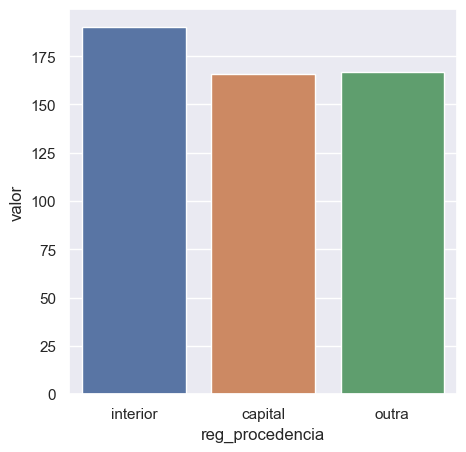

In [24]:
plt.rc('figure', figsize=(5,5))

sns.barplot(x='reg_procedencia', y='valor', estimator=sum, data=df, errorbar=None)

* Comprovar valores por meio de tabelas;
* Soma do gasto total.

In [25]:
df_interior = df[(df['reg_procedencia'] == 'interior') & (df['valor'])]
df_capital = df[(df['reg_procedencia'] == 'capital') & (df['valor'])]
df_outra = df[(df['reg_procedencia'] == 'outra') & (df['valor'])]

In [26]:
gastos = {
    'Interior': df_interior['valor'].sum(),
    'Capital': df_capital['valor'].sum(),
    'Outra': df_outra['valor'].sum()
}

df_gastos = pd.DataFrame({'Total':gastos})
df_gastos

,Total
Capital,165.90
Interior,189.93
Outra,166.67


## 3)
Qual o produto que mais é vendido em quantidade?

* `RESPOSTA:` O produto mais vendido em quantidade é o chocolate.

In [27]:
df.head()

,cod_cadastro,estado_civil,grau_instrucao,num_filhos,salario,idade_anos,reg_procedencia,cod_venda,produto,valor
0,1,solteiro,ensino fundamental,0,4000.0,26,interior,1,Refrigerante,6.5
1,2,casado,ensino fundamental,1,4560.0,32,capital,2,Chocolate,4.0
2,3,casado,ensino fundamental,2,5250.0,36,capital,3,Suco,5.0
3,4,solteiro,ensino medio,0,5730.0,20,outra,4,Bolacha,3.5
4,5,solteiro,ensino fundamental,0,6260.0,40,outra,5,Cereal,11.9


* A `quantiade unitária` de cada produto é 18.

In [28]:
df['produto'].nunique()

18

In [29]:
df['produto'].value_counts().to_frame()

,count
produto,
Chocolate,7
Refrigerante,6
Suco,6
Bolacha,5
Laranja,4
Farinha,4
Feijão,4
Arroz,4
Pó de café,4


## 4) 
Existe alguma característica da que identifique o grupo das pessoas (top 5) que compram mais produtos em
quantidade? E as que gastam mais dinheiro?

#### Análise pessoas que gastam mais dinheiro

A primeira vista, os valores possuem características comuns:
* estado_civil = solteiro;
* grau_instrucao = 1-ensino fundamental;
* reg_procedencia = capital;
* Podutos especificos como queijo e pó de café;
* num_filhos = 0;
* idade_anos > 40.

Filtrando pessoas que mais compram:

In [30]:
maior_qtd_compra = df[df['cod_cadastro'].map(df['cod_cadastro'].value_counts()) > 1]

In [31]:
maiores_gastos = df.sort_values(by='valor', ascending=False).head()

In [32]:
maiores_gastos

,cod_cadastro,estado_civil,grau_instrucao,num_filhos,salario,idade_anos,reg_procedencia,cod_venda,produto,valor
54,34,solteiro,superior,0,18750.0,33,capital,47,Queijo,35.5
6,7,solteiro,ensino fundamental,0,6860.0,41,interior,7,Queijo,35.5
57,35,casado,ensino medio,2,19400.0,48,capital,48,Pó de café,21.8
32,27,solteiro,ensino fundamental,0,13850.0,46,outra,27,Pó de café,21.8
7,8,solteiro,ensino fundamental,0,7390.0,43,capital,8,Pó de café,21.8


## 5)
Você consegue ver alguma relação entre o grau de instrução e o número de filhos? Descreva a sua
interpretação do caso, utilizando os dados para justificar as suas conclusões.

In [33]:
# Tabela cruzada
freq = pd.crosstab(df['grau_instrucao'], df['num_filhos'])
freq

num_filhos,0,1,2,3,5
grau_instrucao,,,,,
ensino fundamental,10,1,2,1,0
ensino medio,10,6,13,0,3
superior,10,0,0,6,0


In [34]:
# Tabela cruzada percentual
freq_pct = freq.div(freq.sum(axis = 1), axis = 0)
freq_pct

num_filhos,0,1,2,3,5
grau_instrucao,,,,,
ensino fundamental,0.714286,0.071429,0.142857,0.071429,0.00000
ensino medio,0.312500,0.187500,0.406250,0.000000,0.09375
superior,0.625000,0.000000,0.000000,0.375000,0.00000


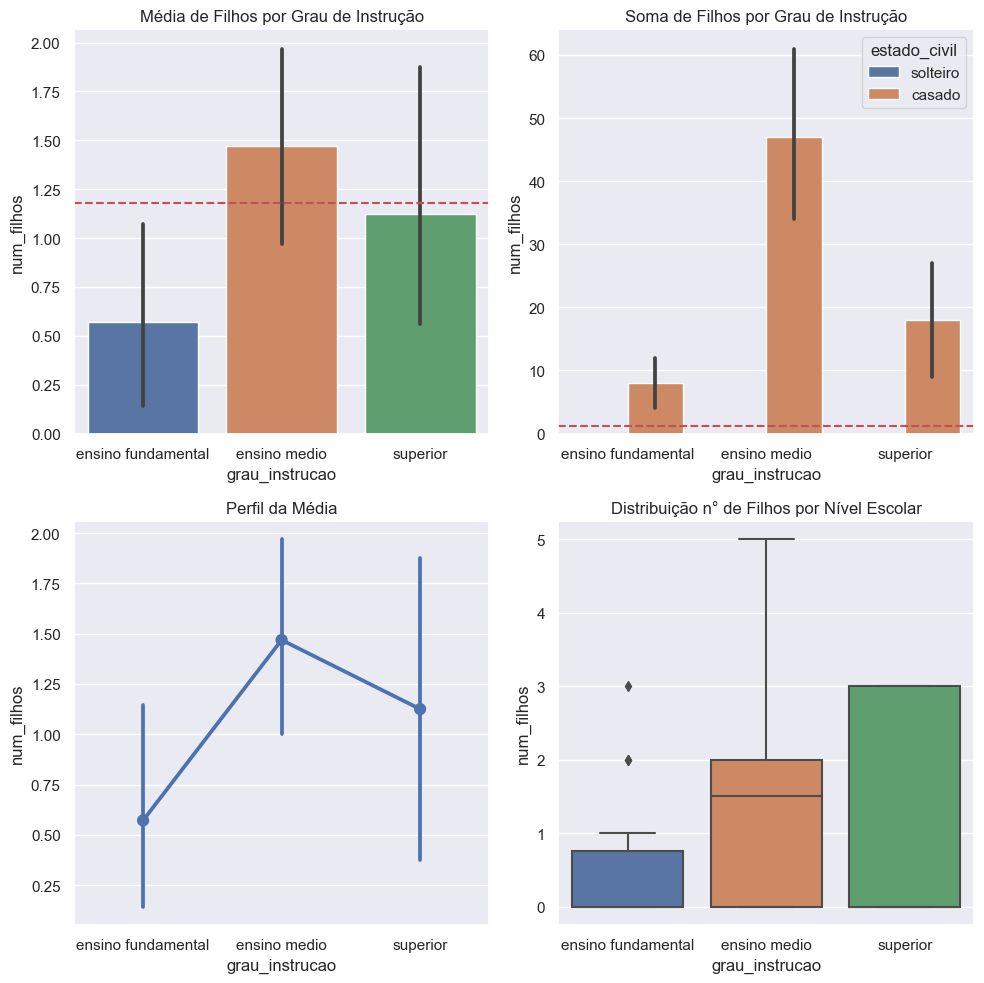

In [35]:
plt.rc('figure', figsize=(10,10))
fig, ax = plt.subplots(2,2)

#Gráficos
ax1 = sns.barplot(ax=ax[0,0], x='grau_instrucao', y='num_filhos', errorbar=('ci', 95), data=df)
ax2 = sns.barplot(ax=ax[0,1], x='grau_instrucao', y='num_filhos', hue='estado_civil', estimator=sum, data=df)
ax3 = sns.pointplot(ax=ax[1,0], x="grau_instrucao", y="num_filhos", errorbar=('ci', 95), data=df)
ax4 = sns.boxplot(ax=ax[1,1], x='grau_instrucao' , y='num_filhos', data=df)

#Título dos Gráficos
ax1.set_title('Média de Filhos por Grau de Instrução')
ax2.set_title('Soma de Filhos por Grau de Instrução')
ax3.set_title('Perfil da Média')
ax4.set_title('Distribuição n° de Filhos por Nível Escolar')

#Linha da média de filhos por grau de instrução
media_ax1 = df['num_filhos'].mean()

#Traçando linha média
ax1.axhline(y=media_ax1, color='r', linestyle='--', label='Média')
ax2.axhline(y=media_ax1, color='r', linestyle='--', label='Média')

plt.tight_layout()

In [36]:
df.grau_instrucao

0     ensino fundamental
1     ensino fundamental
2     ensino fundamental
3           ensino medio
4     ensino fundamental
             ...        
57          ensino medio
58          ensino medio
59              superior
60              superior
61              superior
Name: grau_instrucao, Length: 62, dtype: object

In [39]:
ensino_medio = df.loc[(df['grau_instrucao'] == 'ensino medio')]
ensino_superior = df.loc[(df['grau_instrucao'] == 'superior')]
ensino_fundamental = df.loc[(df['grau_instrucao'] == 'ensino fundamental')]